In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sentiments.csv')
df.head()

,sentence,year,link,source,cardiff,distilbert,finbert,citizenlab
0,Veja o exemplo das urnas eletrônicas,2023,https://www1.folha.uol.com.br/mercado/2023/04/...,Folha de São Paulo,neutral,positive,neutral,Neutral
1,"Pela segunda vez na história, os acadêmicos v...",2023,https://www1.folha.uol.com.br/ilustrada/2023/0...,Folha de São Paulo,neutral,positive,neutral,Neutral
2,Conforme antecipado por sua defesa nesta quar...,2023,https://www1.folha.uol.com.br/poder/2023/04/bo...,Folha de São Paulo,negative,negative,negative,Neutral
3,"Bolsonaro disse ter postado por engano, sob e...",2023,https://www1.folha.uol.com.br/opiniao/2023/04/...,Folha de São Paulo,negative,negative,negative,Neutral
4,"Não apagará o fato, no entanto, de que o punh...",2023,https://www1.folha.uol.com.br/opiniao/2023/04/...,Folha de São Paulo,negative,negative,negative,Negative


In [3]:
df['citizenlab'] = df['citizenlab'].str.lower()
df.head()

,sentence,year,link,source,cardiff,distilbert,finbert,citizenlab
0,Veja o exemplo das urnas eletrônicas,2023,https://www1.folha.uol.com.br/mercado/2023/04/...,Folha de São Paulo,neutral,positive,neutral,neutral
1,"Pela segunda vez na história, os acadêmicos v...",2023,https://www1.folha.uol.com.br/ilustrada/2023/0...,Folha de São Paulo,neutral,positive,neutral,neutral
2,Conforme antecipado por sua defesa nesta quar...,2023,https://www1.folha.uol.com.br/poder/2023/04/bo...,Folha de São Paulo,negative,negative,negative,neutral
3,"Bolsonaro disse ter postado por engano, sob e...",2023,https://www1.folha.uol.com.br/opiniao/2023/04/...,Folha de São Paulo,negative,negative,negative,neutral
4,"Não apagará o fato, no entanto, de que o punh...",2023,https://www1.folha.uol.com.br/opiniao/2023/04/...,Folha de São Paulo,negative,negative,negative,negative


In [4]:
def generate_si(model):
    df_si = pd.DataFrame(df.groupby('year')[model].value_counts())
    df_si.reset_index(names = ['year', 'polarity'], inplace = True)
    df_si = df_si.pivot(index = 'year', columns = 'polarity', values = model)
    df_si.fillna(0, inplace = True)
    df_si['sentiment_index'] = (df_si['positive']-df_si['negative'])/(df_si['negative']+df_si['neutral']+df_si['positive'])
    return df_si

In [5]:
sentiment_cardiff = generate_si('cardiff')
sentiment_distilbert = generate_si('distilbert')
sentiment_finbert = generate_si('finbert')
sentiment_citizenlab = generate_si('citizenlab')

sentiment_series = pd.DataFrame({'cardiff':sentiment_cardiff['sentiment_index'],
                                 'distilbert':sentiment_distilbert['sentiment_index'],
                                 'finbert':sentiment_finbert['sentiment_index'],
                                 'citizenlab':sentiment_citizenlab['sentiment_index']})

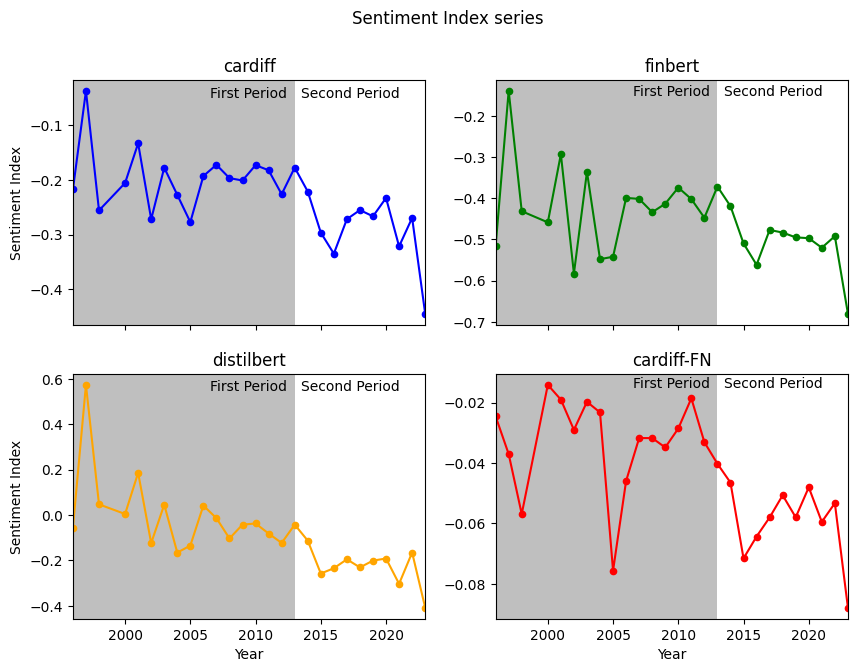

In [6]:
fig, ax = plt.subplots(2, 2, sharex = True, figsize = (10,7))

ax[0,0].plot(sentiment_series.index, sentiment_series['cardiff'], label = 'cardiff', color = 'blue', marker = 'o', markersize = 4.5)
ax[1,0].plot(sentiment_series.index, sentiment_series['distilbert'], label = 'distilbert', color = 'orange', marker = 'o', markersize = 4.5)
ax[0,1].plot(sentiment_series.index, sentiment_series['finbert'], label = 'finbert', color = 'green', marker = 'o', markersize = 4.5)
ax[1,1].plot(sentiment_series.index, sentiment_series['citizenlab'], label = 'citizenlab', color = 'red', marker = 'o', markersize = 4.5)

ax[0,0].set_title('cardiff')
ax[0,0].set_ylabel('Sentiment Index')
ax[0,0].axvspan(1996, 2013, facecolor='gray', alpha=0.5)
ax[0,0].margins(x=0)
ax[0,0].text(2006.5,-0.05,'First Period')
ax[0,0].text(2013.5,-0.05,'Second Period')

ax[1,0].set_title('distilbert')
ax[1,0].set_ylabel('Sentiment Index')
ax[1,0].set_xlabel('Year')
ax[1,0].axvspan(1996, 2013, facecolor='gray', alpha=0.5)
ax[1,0].margins(x=0)
ax[1,0].text(2006.5,0.55,'First Period')
ax[1,0].text(2013.5,0.55,'Second Period')

ax[0,1].set_title('finbert')
ax[0,1].axvspan(1996, 2013, facecolor='gray', alpha=0.5)
ax[0,1].margins(x=0)
ax[0,1].text(2006.5,-0.15,'First Period')
ax[0,1].text(2013.5,-0.15,'Second Period')

ax[1,1].set_title('cardiff-FN')
ax[1,1].set_xlabel('Year')
ax[1,1].axvspan(1996, 2013, facecolor='gray', alpha=0.5)
ax[1,1].margins(x=0)
ax[1,1].text(2006.5,-0.015,'First Period')
ax[1,1].text(2013.5,-0.015,'Second Period')

fig.suptitle('Sentiment Index series')

plt.savefig('models_plot.png', bbox_inches='tight')
plt.show()